In [1]:
%pylab inline
from operator import itemgetter
import calin.math.hex_array
import calin.ix.iact_data.instrument_layout

Populating the interactive namespace from numpy and matplotlib


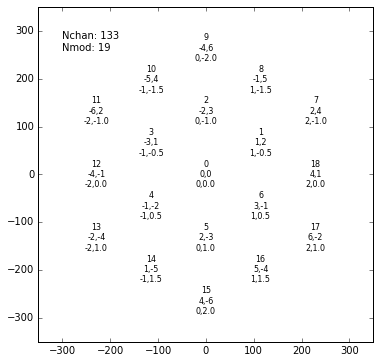

In [2]:
figure(figsize=[6,6])
spacing = 50
rad = 6*spacing
axis(asarray([-1,1,-1,1])*(rad+spacing))
nchan = 0
nmod = 0
u1,v1 = calin.math.hex_array.cluster_hexid_to_center_uv(1,1,False)
x1,y1 = calin.math.hex_array.uv_to_xy(u1,v1)
rot = arctan2(-y1,x1) + 30/180*pi
crot = cos(rot)
srot = sin(rot)
modvec = []
for i in range(0,calin.math.hex_array.ringid_to_nsites_contained(2)):
    uc,vc = calin.math.hex_array.cluster_hexid_to_center_uv(i,1,False)
    xxc,yyc = calin.math.hex_array.uv_to_xy(uc,vc)
    xc = spacing*(crot*xxc - srot*yyc)
    yc = spacing*(crot*yyc + srot*xxc)
    if(xc*xc+yc*yc > rad*rad):
        continue
    mod = dict()
    mod['i'] = i
    mod['uc'] = uc
    mod['vc'] = vc
    mod['xc'] = xc
    mod['yc'] = yc
    mod['ix'] = (vc*2+uc*3)/7
    mod['iy'] = -(vc+uc)+2.5*mod['ix']
    modvec.append(mod)
    text(xc,yc,'%d\n%d,%d\n%d,%.1f'%(nmod,uc,vc,mod['ix'],mod['iy']),
         ha='center',va='center',fontsize=8)
    nchan=nchan+7
    nmod = nmod+1
#gca().add_patch(Circle((0,0),rad,color='r',fill=False))
text(-rad,rad,'Nchan: %d\nNmod: %d\n'%(nchan,nmod),va='top')

In [3]:
modvec.sort(key=itemgetter('ix', 'iy'))

In [18]:
grid_chan_index = dict()
for imod,mod in enumerate(modvec):
    mhid = calin.math.hex_array.cluster_hexid_to_member_hexid(mod['i'],1,False)
    for imodchan in range(0,len(mhid)):
        ichan = imod*7+imodchan
        igridchan = mhid[gridchanmap[imodchan]]
        grid_chan_index[igridchan] = ichan

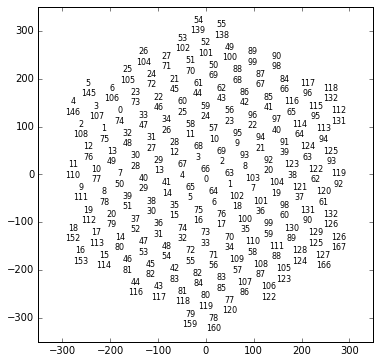

In [28]:
layout = calin.ix.iact_data.instrument_layout.CameraLayout()

layout.set_camera_type(layout.NECTARCAM_TESTBENCH_19CHANNEL);
#  repeated ChannelLayout channel                           = 10 [
layout.set_pixel_grid_layout(layout.HEX_GRID);
layout.set_pixel_grid_spacing(spacing/10);
layout.set_pixel_grid_rotation(rot/pi*180);
layout.set_pixel_grid_offset_x(0);
layout.set_pixel_grid_offset_y(0);
layout.set_pixel_grid_geometric_area(layout.pixel_grid_spacing()**2*sqrt(3)/2)
layout.set_channels_per_modules(7)
#  ModuleLayout module                                      = 21 [
#    (CFO).desc = "Layout of each module." ];
layout.set_adc_gains(layout.PARALLEL_DUAL_GAIN)
layout.set_adc_bits(12)
layout.set_can_read_waveforms(True);
layout.set_can_read_charges(True);
layout.set_can_read_peak_sample(False);

modchanmap = [ 3, 0, 6, 5, 4, 2, 1 ]
gridchanmap = [ 1, 6, 5, 0, 4, 3, 2 ]
figure(figsize=[6,6])
axis(asarray([-1,1,-1,1])*(rad+spacing))
chanvec = []
for imod,mod in enumerate(modvec):
    m = layout.add_module()
    mhid = calin.math.hex_array.cluster_hexid_to_member_hexid(mod['i'],1,False)
#    print(mhid)
    for imodchan in range(0,len(mhid)):
        ichan = imod*7+imodchan
        igridchan = mhid[gridchanmap[imodchan]]
        u,v = calin.math.hex_array.hexid_to_uv(igridchan)
        xxc,yyc = calin.math.hex_array.uv_to_xy(u,v)
        xc = spacing*(crot*xxc - srot*yyc)
        yc = spacing*(crot*yyc + srot*xxc)
        m.add_channels_in_module(ichan)
        c = layout.add_channel()
        c.set_channel_index(ichan)
        c.set_pixel_index(ichan)
        c.set_pixel_grid_index(igridchan)
        c.set_channel_set_index(0)
        c.set_module_index(imod)
        c.set_module_channel_index(imodchan)
        c.set_x(xc)
        c.set_y(yc)
        c.set_diameter(layout.pixel_grid_spacing())
        c.set_geometric_area(layout.pixel_grid_geometric_area())
        neighbours = calin.math.hex_array.hexid_to_neighbor_hexids(igridchan)
        for nid in filter(lambda id: grid_chan_index.get(id), neighbours):
            c.add_neighbour_channel_indexes(grid_chan_index.get(nid))
        hold('on')
        text(xc,yc,'%d\n%d'%(ichan,igridchan),
             ha='center',va='center',fontsize=8)


In [29]:
print(layout.DebugString())

camera_type: NECTARCAM_TESTBENCH_19CHANNEL
channel {
  pixel_grid_index: 74
  x: -180.02975944469372
  y: 122.83845372799884
  diameter: 5
  geometric_area: 21.650635094610966
  neighbour_channel_indexes: 33
  neighbour_channel_indexes: 23
  neighbour_channel_indexes: 6
  neighbour_channel_indexes: 3
  neighbour_channel_indexes: 1
  neighbour_channel_indexes: 32
}
channel {
  channel_index: 1
  pixel_index: 1
  pixel_grid_index: 75
  module_channel_index: 1
  x: -212.7624429800926
  y: 85.042006427076132
  diameter: 5
  geometric_area: 21.650635094610966
  neighbour_channel_indexes: 32
  neighbour_channel_indexes: 3
  neighbour_channel_indexes: 2
  neighbour_channel_indexes: 12
  neighbour_channel_indexes: 13
}
channel {
  channel_index: 2
  pixel_index: 2
  pixel_grid_index: 108
  module_channel_index: 2
  x: -261.8614682831909
  y: 94.4911182523068
  diameter: 5
  geometric_area: 21.650635094610966
  neighbour_channel_indexes: 1
  neighbour_channel_indexes: 3
  neighbour_channel_inde